In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('canada_edu_gdpless.csv')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UIS.NIRA.1               44 non-null     float64
 1   UIS.XSPENDP.FDPUB.FNS    44 non-null     float64
 2   BAR.PRM.SCHL             44 non-null     float64
 3   BAR.SEC.SCHL             44 non-null     float64
 4   BAR.TER.SCHL             44 non-null     float64
 5   BAR.TOT.SCHL             44 non-null     float64
 6   BAR.NOED.15UP.ZS         44 non-null     float64
 7   BAR.PRM.CMPT.15UP.ZS     44 non-null     float64
 8   BAR.PRM.ICMP.15UP.ZS     44 non-null     float64
 9   BAR.SEC.CMPT.15UP.ZS     44 non-null     float64
 10  BAR.SEC.ICMP.15UP.ZS     44 non-null     float64
 11  BAR.TER.CMPT.15UP.ZS     44 non-null     float64
 12  BAR.TER.ICMP.15UP.ZS     44 non-null     float64
 13  SE.XPD.TOTL.GB.ZS        44 non-null     float64
 14  SE.XPD.TERT.ZS           44 

In [48]:
df.describe()

,UIS.NIRA.1,UIS.XSPENDP.FDPUB.FNS,BAR.PRM.SCHL,BAR.SEC.SCHL,BAR.TER.SCHL,BAR.TOT.SCHL,BAR.NOED.15UP.ZS,BAR.PRM.CMPT.15UP.ZS,BAR.PRM.ICMP.15UP.ZS,BAR.SEC.CMPT.15UP.ZS,...,BAR.TER.ICMP.15UP.FE.ZS,SE.XPD.TOTL.GB.ZS.2,SE.XPD.TERT.ZS.2,SE.XPD.TOTL.GD.ZS.2,SL.TLF.ADVN.ZS.2,SL.TLF.BASC.ZS.2,SL.TLF.INTM.ZS.2,SL.TLF.TOTL.IN.2,SP.POP.GROW.2,SI.POV.GINI.2
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,4.400000e+01,44.000000,44.000000
mean,91.107821,69.008087,5.581727,3.841288,0.744576,10.168273,1.021136,6.995682,15.459318,25.651364,...,13.342727,10.956684,28.989783,5.143450,80.301110,48.395523,72.321111,8.141825e+06,0.604826,28.753409
std,3.637110,1.576972,0.184761,0.720574,0.284598,1.155726,0.292123,4.430775,8.378616,5.416208,...,6.100889,0.696873,1.951259,0.298542,0.319156,0.766300,0.670345,5.271550e+05,0.228663,0.953458
min,88.043053,65.455780,5.327333,2.763333,0.487333,8.596000,0.670000,2.240000,4.790000,17.390000,...,4.140000,8.866610,25.154160,4.627190,79.709999,46.119999,70.110001,6.912131e+06,0.160614,26.800000
25%,88.043053,68.887654,5.425333,3.414000,0.563333,9.528667,0.830000,3.580000,9.280000,20.300000,...,8.650000,10.780115,27.488903,5.034287,80.247499,48.395500,72.321111,8.141825e+06,0.465094,28.358250
50%,90.228756,68.887654,5.618667,3.785333,0.670667,9.968667,0.880000,5.370000,13.490000,27.250000,...,13.970000,10.956667,28.916090,5.143444,80.301110,48.395500,72.321111,8.141825e+06,0.609102,28.400000
75%,91.107821,68.887654,5.720000,4.227333,0.754667,10.704000,1.080000,8.790000,19.110000,30.190000,...,17.360000,11.406195,30.222520,5.231253,80.301110,48.395500,72.321111,8.452797e+06,0.724788,29.340000
max,99.719414,74.186705,5.857333,5.083333,1.342000,12.282667,1.590000,16.820000,31.970000,32.110000,...,23.570000,12.193490,33.254150,6.014610,81.660004,50.430000,73.720001,9.029065e+06,1.238933,31.100000


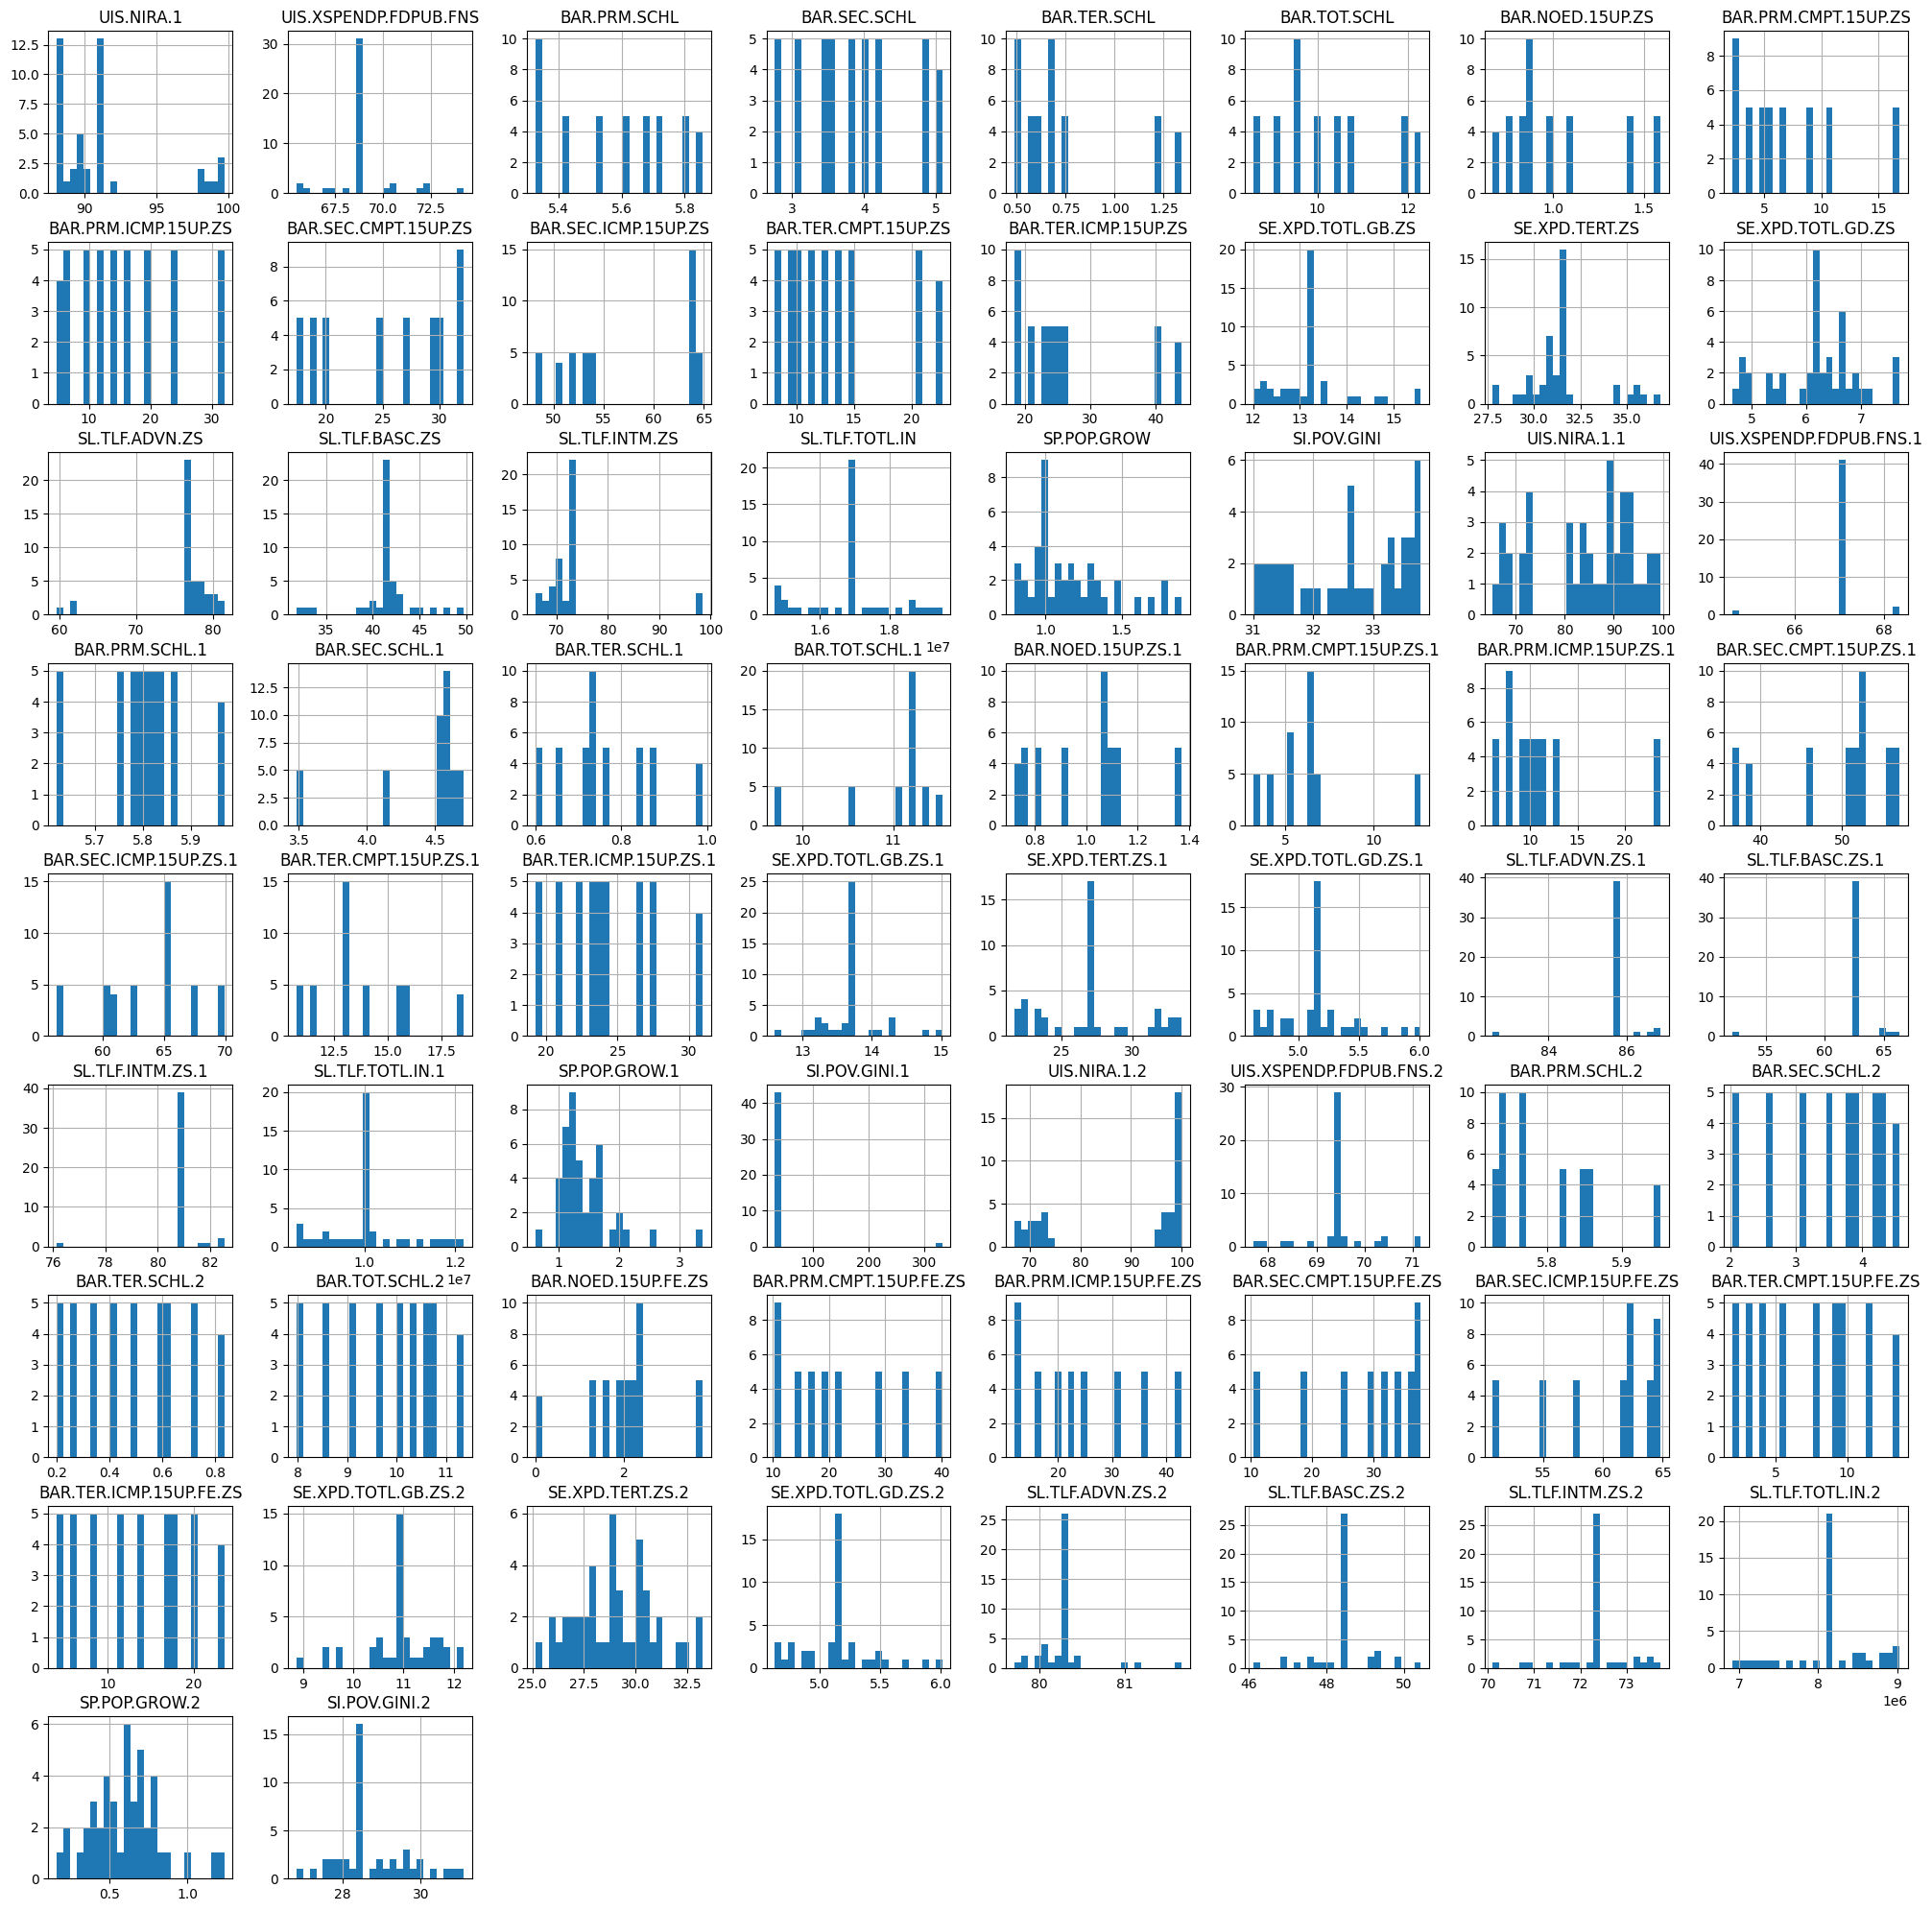

In [49]:
df.hist(bins=25, figsize=(25, 25))
plt.show()

In [50]:
from sklearn.model_selection import train_test_split


y = df['SI.POV.GINI']
X = df.drop('SI.POV.GINI', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_scaled, y_train)

SVR()

In [53]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, HalvingRandomSearchCV, RandomizedSearchCV

svr_rmse = -cross_val_score(svr, X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error")

pd.Series(svr_rmse).describe()

count    10.000000
mean      0.371149
std       0.211864
min       0.129687
25%       0.208030
50%       0.333591
75%       0.562033
max       0.654394
dtype: float64

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [55]:
lin_rmse = -cross_val_score(lin_reg, X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error")

pd.Series(lin_rmse).describe()

count    10.000000
mean      0.350298
std       0.171069
min       0.109376
25%       0.221902
50%       0.351549
75%       0.442631
max       0.698713
dtype: float64

In [56]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=10)

In [57]:
rfr_rmses = -cross_val_score(rfr, X_train_scaled, y_train, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(rfr_rmses).describe()

count    10.000000
mean      0.404187
std       0.272557
min       0.049653
25%       0.209778
50%       0.318066
75%       0.624230
max       0.909525
dtype: float64

In [58]:
hyperparameters = {
  'kernel': ['poly', 'rbf', 'linear'], 
  'degree': list(range(1,10)),
  'gamma': ['auto', 'scale']
}

svr_search = RandomizedSearchCV(svr, hyperparameters, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=True, n_jobs=-1)
svr_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
                   param_distributions={'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['poly', 'rbf', 'linear']},
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=True)

In [59]:
svr_search.best_params_

{'kernel': 'linear', 'gamma': 'auto', 'degree': 4}

In [60]:
final_svr = svr_search.best_estimator_

In [61]:
cv_res_svr_search = pd.DataFrame(svr_search.cv_results_)
cv_res_svr_search.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res_svr_search.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_degree,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001824,0.001578,0.000363,0.000261,linear,auto,4,"{'kernel': 'linear', 'gamma': 'auto', 'degree'...",-0.254695,-0.517408,...,-0.091641,-0.089282,-0.090939,-0.091027,-0.091668,-0.096941,-0.094650,-0.094309,-0.092309,0.002229
3,0.000976,0.000704,0.000417,0.000294,linear,scale,2,"{'kernel': 'linear', 'gamma': 'scale', 'degree...",-0.254695,-0.517408,...,-0.091641,-0.089282,-0.090939,-0.091027,-0.091668,-0.096941,-0.094650,-0.094309,-0.092309,0.002229
5,0.000795,0.000383,0.000224,0.000056,linear,scale,8,"{'kernel': 'linear', 'gamma': 'scale', 'degree...",-0.254695,-0.517408,...,-0.091641,-0.089282,-0.090939,-0.091027,-0.091668,-0.096941,-0.094650,-0.094309,-0.092309,0.002229
9,0.001498,0.000605,0.000983,0.000792,linear,scale,6,"{'kernel': 'linear', 'gamma': 'scale', 'degree...",-0.254695,-0.517408,...,-0.091641,-0.089282,-0.090939,-0.091027,-0.091668,-0.096941,-0.094650,-0.094309,-0.092309,0.002229
4,0.000624,0.000279,0.000235,0.000117,rbf,scale,5,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': 5}",-0.232914,-0.434269,...,-0.148686,-0.154674,-0.153369,-0.159925,-0.149858,-0.144362,-0.120213,-0.155497,-0.151771,0.012665


In [62]:
hyperparameters = {
  'max_depth': list(range(6, 22)),
  'max_features': list(range(4, 12)),
  'n_estimators': list(range(1, 50))
}

wine_rfr_search = RandomizedSearchCV(rfr, hyperparameters, cv=10, n_iter=20, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=True, n_jobs=-1)
wine_rfr_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=10),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21],
                                        'max_features': [4, 5, 6, 7, 8, 9, 10,
                                                         11],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=True)

In [63]:
wine_rfr_search.best_params_

{'n_estimators': 14, 'max_features': 8, 'max_depth': 9}

In [64]:
wine_final_rfr = wine_rfr_search.best_estimator_

In [65]:
from sklearn.metrics import mean_squared_error
from scipy import stats

final_preds_svr = final_svr.predict(X_test_scaled)

final_rmse_svr = mean_squared_error(y_test, final_preds_svr, squared=False)
final_mse_svr = mean_squared_error(y_test, final_preds_svr, squared=True)

print("RMSE:", final_rmse_svr)
print("MSE:", final_mse_svr)

RMSE: 0.5296866869122381
MSE: 0.28056798629206336


In [66]:
final_preds_rfr = wine_final_rfr.predict(X_test_scaled)

final_rmse_rfr = mean_squared_error(y_test, final_preds_rfr, squared=False)
final_mse_rfr = mean_squared_error(y_test, final_preds_rfr, squared=True)

squared_errors = (final_preds_rfr - y_test) ** 2

print("RMSE:", final_rmse_rfr)
print("MSE:", final_mse_rfr)

RMSE: 0.4068022180708225
MSE: 0.165488044627341


In [67]:
final_svr.predict(
    np.array(
        [88.04305267,68.88765423,5.334666667,2.763333333,0.4993333333,8.596,1.08,16.82,31.97,17.39,48.21,9.66,18.74,13.22047428,31.59305006,6.200091389,76.43441598,41.45066667,73.33933258,16838398.58,1.3978316,32.59333333,88.97019958,67.09266667,5.62,3.48,0.6,9.7,0.76,12.7,23.73,36.59,56.25,10.76,19.26,13.68523158,26.93811741,5.143452963,85.826,62.696,80.98798,10076001.88,1.970188879,31.3,73.0117188,69.468375,5.738,2.030666667,0.1993333333,7.966,2.3,40.17,42.8,10.47,50.76,1.94,4.14,10.95666667,25.15415955,5.143444444,80.30111017,48.3955,72.32111111,8141825.25,1.238932661]).reshape(1, -1))

ValueError: X has 25 features, but SVR is expecting 65 features as input.

In [ ]:
final_svr.predict(
    np.array(
        [0 for x in range(25)]).reshape(1, -1))